In [8]:
from PIL import Image, ImageFilter,ImageColor
import numpy as np
import cv2


In [9]:
import pandas as pd

In [10]:
tab = pd.read_excel('/Users/gggg/Downloads/фото в стиле ТеДо, расписанные по критериям в файле/Пример оценки критериев в стиле ТеДо.xlsx')


In [11]:
names = tab['Unnamed: 0'][1:]

In [21]:
im = Image.open('/Users/gggg/Downloads/фото в стиле ТеДо, расписанные по критериям в файле/shutterstock_75681181.jpg',)

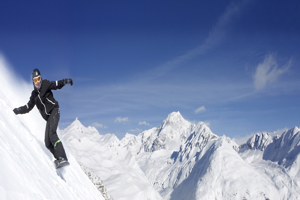

In [22]:
im.resize((300,200))

In [160]:
%%time


# rgb_colors = [[0,0,0],[0, 44, 98], [0, 76, 137], [0, 104, 169],[60,119,174],[91,155,204],[131,152,174],[147,172,192],[212,215,219],[217,215,216]]
# colors = [[b, g, r] for [r, g, b] in rgb_colors]
# print(colors)
def chek(imPath):
    
    colors = [[0, 0, 0], [98, 44, 0], [137, 76, 0], [169, 104, 0], [174, 119, 60], [204, 155, 91], [174, 152, 131], [192, 172, 147], [219, 215, 212], [216, 215, 217]] # BGR
    tolerance = 50
    bounds = [(np.array([color[0] - tolerance, color[1] - tolerance, color[2] - tolerance]),
               np.array([color[0] + tolerance, color[1] + tolerance, color[2] + tolerance])) for color in colors]
    
    image = cv2.imread(imPath)
    masks = [cv2.inRange(image, lower_bound, upper_bound) for lower_bound, upper_bound in bounds]

    rez = np.zeros((masks[0].shape[0],masks[0].shape[1]))
    for i in masks:
        rez = np.add(rez,i)
    per = np.count_nonzero(rez)/(masks[0].shape[0] * masks[0].shape[1])
    
    if per >= 0.7:
        return 1, per
    else:
        return 0, per



CPU times: user 8 µs, sys: 26 µs, total: 34 µs
Wall time: 35 µs


In [139]:
import os

def get_files_in_directory(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and not f.startswith('.')]


In [158]:
#проверка температуры
def chek_temputer(pathIm):
    img = cv2.imread(pathIm)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    average_hue = np.mean(hsv[:,:,0])

    return average_hue

In [140]:
paths_to_stiled = get_files_in_directory('/Volumes/Zx20/tedohack/Фото в стиле ТеДо')
paths_to_UNstiled = get_files_in_directory('/Volumes/Zx20/tedohack/Фото НЕ в стиле ТеДо')

In [146]:
semp = 20

In [156]:
%%time
s = 0
for i in range(semp):
    # if paths_to_stiled[i][0] == '.':
    #     continue

    h, per = chek('/Volumes/Zx20/tedohack/Фото в стиле ТеДо/'+paths_to_stiled[i])
    
    s += h
    print(per,h)
s/semp

0.8121980355661202 1
0.7268431733050048 1
0.9318911992606929 1
0.683630961916357 0
0.5945549703313554 0
0.9806817183310653 1
0.71781175 1
0.9778580461248285 1
0.9987375275362832 1
0.7281372748480903 1
0.9071553745724006 1
0.8432995064050355 1
0.8353257614058623 1
0.9599237554863 1
0.8673869174198121 1


Premature end of JPEG file


0.9583543589004229 1
0.9308405862496855 1
0.9231727981850519 1
0.751653146125845 1
0.8584239372239667 1
CPU times: user 5.3 s, sys: 2.73 s, total: 8.03 s
Wall time: 9.28 s


0.9

In [144]:

s/semp

0.805

In [159]:
%%time
sU = 0
for i in range(semp):
    # if paths_to_UNstiled[i][0] == '.':
    #     continue

    h, per = chek('/Volumes/Zx20/tedohack/Фото НЕ в стиле ТеДо/'+paths_to_UNstiled[i])
    
    sU += h
    print(per,h)
sU/semp

7.672599884617052
76.73751006137186
64.44919512673798
40.48524621102239
42.68922459194873
85.92452096028192
88.74285546632633
18.94338893502907
16.599861959485107
34.69245872294763
8.737212683171567
9.940493649510037
55.845030769384714
84.90467107452686
93.39480789865206
13.9582770663407
61.80229298981426
72.84635930735931
108.54861936601115
95.26788352302027
CPU times: user 2.24 s, sys: 270 ms, total: 2.51 s
Wall time: 2.28 s


0.0

0.26

[-20  24  78] [ 20  64 118]
[-20  56 117] [ 20  96 157]
[-20  84 149] [ 20 124 189]
[ 40  99 154] [ 80 139 194]
[ 71 135 184] [111 175 224]
[111 132 154] [151 172 194]
[127 152 172] [167 192 212]
[192 195 199] [232 235 239]
[197 195 196] [237 235 236]
